<a href="https://colab.research.google.com/github/kassy75035/Computer-Vision/blob/main/Day003_color_spave_op_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 作業

實作各種不一樣的方式來調整飽和 / 對比 / 明亮

1. 改變 color space 來調整飽和度
2. 實作直方圖均衡
3. alpha/ beta 調整對比 / 明亮

In [1]:
import cv2
import numpy as np

from google.colab import files
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [2]:
import matplotlib.pylab as plt
img_path = '/content/gdrive/My Drive/Colab Notebooks/ComputerVision/data/lena.png'

# 以彩色圖片的方式載入
img = cv2.imread(img_path, cv2.IMREAD_COLOR)

## 改變飽和度

- 轉換成 HSV color space, 改變 s channel 的值

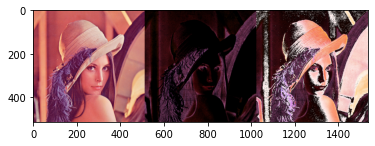

In [3]:
# 為了要改變飽和度，我們先把 color space 轉成 HSV 格式
img_rbg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
change_percentage = 0.5

# 針對飽和度的值做改變，超過界線 0~1 的都會 bound
# 在 HSV color space 減少飽和度
# saturation is at the　second channel 
img_hsv_down = img_hsv.astype('float32')
img_hsv_down[...,1] = img_hsv_down[...,1]/255 - change_percentage
img_hsv_down[img_hsv_down[...,1] < 0] = 0
img_hsv_down[...,1] = img_hsv_down[...,1] * 255
img_hsv_down = img_hsv_down.astype('uint8')

# 在 HSV color space 增加飽和度
img_hsv_up = img_hsv.astype('float32')
img_hsv_up[...,1] = img_hsv_up[...,1]/255 + change_percentage
img_hsv_up[img_hsv_up[...,1] < 0] = 0
img_hsv_up[...,1] = img_hsv_up[...,1] * 255
img_hsv_up = img_hsv_up.astype('uint8')

# 轉換 color space 回 BGR
img_hsv_down = cv2.cvtColor(img_hsv_down, cv2.COLOR_HLS2RGB)
img_hsv_up = cv2.cvtColor(img_hsv_up, cv2.COLOR_HLS2RGB)

# 組合圖片 + 顯示圖片
img_hsv_change = np.hstack((img_rbg, img_hsv_down, img_hsv_up))
plt.imshow(img_hsv_change)
plt.show()

## 直方圖均衡

1. case 1: 把彩圖拆開對每個 channel 個別做直方圖均衡再組合起來
2. case 2: 轉換 color space 到 HSV 之後對其中一個 channel 做直方圖均衡

<class 'numpy.ndarray'>


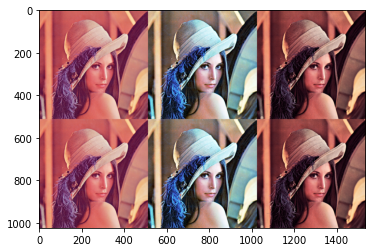

In [64]:
# case 1
# 每個 channel 個別做直方圖均衡
# b,g,r = cv2.split(img)
b = cv2.equalizeHist(img[...,0])
g = cv2.equalizeHist(img[...,1])
r = cv2.equalizeHist(img[...,2])

# 組合經過直方圖均衡的每個 channel
img_bgr_equal = cv2.merge((b,g,r))
img_bgr_equal = cv2.cvtColor(img_bgr_equal, cv2.COLOR_BGR2RGB)
# case 2 - 轉換 color space 後只對其中一個 channel 做直方圖均衡
img_hsv_equal = img_hsv
img_hsv_equal[...,2] = cv2.equalizeHist(img_hsv[...,2])
img_hsv_equal = cv2.cvtColor(img_hsv_equal, cv2.COLOR_HSV2RGB)

img_equal = np.hstack((img_rbg, img_bgr_equal, img_hsv_equal))
img_equal2 = np.hstack((img_rbg, img_bgr_equal, img_hsv_equal))
print(type(img_equal))
test = np.vstack((img_equal, img_equal2))
plt.imshow(test)
plt.show()


## 調整對比 / 明亮

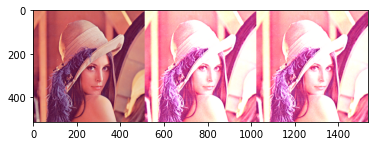

In [38]:
# alpha: 控制對比度 (1.0~3.0)
# beta: 控制明亮度 (0~255)
add_contrast = cv2.convertScaleAbs(img, alpha=2, beta=0)
img_contrast = cv2.cvtColor(add_contrast, cv2.COLOR_BGR2RGB)
add_lightness = cv2.convertScaleAbs(img, alpha=1, beta=50)
img_lightness = cv2.cvtColor(add_contrast, cv2.COLOR_BGR2RGB)
# 組合圖片 + 顯示圖片
img_contrast_light = np.hstack([img_rbg, img_contrast, img_lightness])
plt.imshow(img_contrast_light)
plt.show()

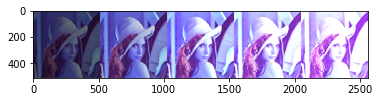

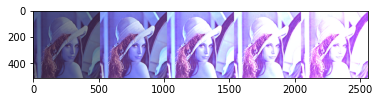

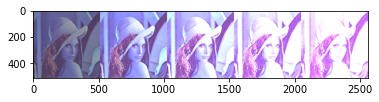

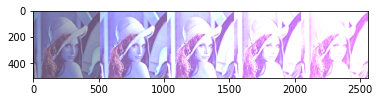

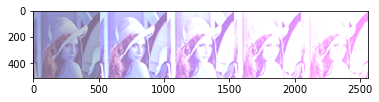

In [81]:
# Try a range of parameters
img_alpha = [0.5,1,1.5,2,2.5]
img_beta = [0,25,50,75,100]
for b in img_beta:
  alpha_stack = []
  for a in img_alpha:
    alpha_stack_dict = cv2.convertScaleAbs(img, alpha=a, beta=b)
    alpha_stack.append(alpha_stack_dict)
  img_contrast_light = np.hstack(alpha_stack)
  plt.imshow(img_contrast_light)
  plt.show()